# PAM GtACR1, starved flies

In [8]:
import numpy as np
import os
import time
import scipy
import glob
import sys
from datetime import datetime
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

import importlib
import pandas as pd
import scipy.stats as spstats

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

import google_drive as gdrive

In [9]:
importlib.reload(util)
util.set_sns_style(style='dark')
%matplotlib notebook

In [10]:
# if util.get_os() == 'Linux':
#     rootdir = '/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data'
# elif util.get_os() == 'Darwin':
#     rootdir = '/home/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'
# else:
#     rootdir=None
#     print("Unknown os: {}".format(util.get_os()))
rootdir = util.get_rootdir()
experiment = 'PAM_GtACR1'

src_dir = os.path.join(rootdir, experiment)
# # src_dir = '/Users/julianarhee/Documents/rutalab/data/test'
# print(src_dir)
fig_id = os.path.join('/Edge_Tracking', rootdir.split('/Edge_Tracking/')[1], experiment)
print(fig_id)
savedir = '{}/jyr/{}'.format(rootdir, experiment)
savedir = savedir.replace(" ", "")
figdir = os.path.join(savedir, 'figures')
print("Saving figures to:{}    {}".format('\n', figdir))
if not os.path.exists(figdir):
    os.makedirs(figdir)

/Edge_Tracking/Data/PAM_GtACR1
Saving figures to:
    /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_GtACR1/figures


In [11]:
select_logs = [
    '10292021-142308_PAMGTACR1_thresh_lights_LT_Fly2_002.log',
    '10292021-143856_PAMGTACR1_thresh_lights_LT_Fly2_003.log',
    '11102021_Fly1/11102021-104614_PAMGtACR1_thresh_lights_old_food_yeast_Fly1_001.log',
    '11102021-110114_PAMGTACR1_thresh_lights_old_food_yeast_Fly1_002.log',
    '11102021-134854_PAMGtACR1_thresh_lights_old_food_yeast_Fly2_001.log',
    '11102021-140908_PAMGtACR1_thresh_lights_old_food_yeast_Fly2_002.log',
    '11122021-151822_PAMGtACR1_Fly1_001.log',
    '11122021-151822_PAMGtACR1_Fly1_001.log',
    '11152021-150321_PAMGtACR1_Fly1_002.log',
    '11152021-153105_PAMGtACR1_Fly1_003.log',
    '11162021-104332_PAMGTACR1_Fly1_001.log',
    '11162021-105012_PAMGtACR1_Fly1_002.log',
]

In [12]:
importlib.reload(butil)

<module 'behavior' from '/home/julianarhee/Repositories/plume-tracking/behavior.py'>

In [33]:
importlib.reload(gdrive)

<module 'google_drive' from '/home/julianarhee/Repositories/plume-tracking/google_drive.py'>

#### GtACR1 has specified files from Andy

In [34]:
print(experiment)
loginfo_fpath = os.path.join(savedir, 'info.pkl')

if os.path.exists(loginfo_fpath):
    logdf = gdrive.load_gdrive_df(loginfo_fpath)
else:
    logdf = gdrive.get_info_from_gsheet(experiment)
logdf.shape

PAM_GtACR1


(62, 6)

In [35]:
logdf.head()

,fly,date,experiment,log,mfc,filepath
0,1,20211026,inside,10262021-113334_PAMGtACR1_thresh_lights_on_Fly...,new,/home/julianarhee/edgetracking-googledrive/Edg...
1,1,20211026,none,10262021-114313_PAMGTACR1_thresh_no_lights_Fly...,new,/home/julianarhee/edgetracking-googledrive/Edg...
2,1,20211026,outisde,10262021-120011_PAMGtACR1_lights_outside_Fly1_...,new,/home/julianarhee/edgetracking-googledrive/Edg...
3,1,20211026,none,10262021-125040_PAMGtACR1_no_lights_strip.log,new,/home/julianarhee/edgetracking-googledrive/Edg...
4,2,20211027,none,10272021-150422_PAMGtACR1_no_lights_Fly1_001.log,new,/home/julianarhee/edgetracking-googledrive/Edg...


#### get filepaths to raw log

In [18]:
if 'filepath' not in logdf.columns:
    print("Finding filepaths...")
    logdf['filepath'] = None
    #curr_fns = logdf[logdf['experiment']=='inside']['log'].values
    curr_fns = logdf['log'].values
    for fn in curr_fns:
        found_files=[]
        print(fn)
        try:
            found_files = glob.glob(os.path.join(src_dir, '*/*/{}'.format(fn)))
            assert len(found_files)==1, "No file found, checking one dir up."
        except AssertionError as e:
            found_files = glob.glob(os.path.join(src_dir, '*/{}'.format(fn)))
            assert len(found_files)==1, "No file found: {}.".format(fn)
        if len(found_files)==1:
            logdf.loc[logdf['log']==fn, 'filepath'] = found_files[0] 

    # save
    import _pickle as pkl
    gdrive.save_gdrive_df(logdf, loginfo_fpath)


10262021-113334_PAMGtACR1_thresh_lights_on_Fly1_001.log
10262021-114313_PAMGTACR1_thresh_no_lights_Fly1_002.log
10262021-120011_PAMGtACR1_lights_outside_Fly1_003.log
10262021-125040_PAMGtACR1_no_lights_strip.log
10272021-150422_PAMGtACR1_no_lights_Fly1_001.log
10272021-151514_PAMGtACR1_thresh_lights_on_Fly1_002.log
10272021-154410_PAMGTACR1_thresh_lights_Fly1_003.log
10272021-160023_PAMGtACR1_thresh_lights_LT_early_Fly1_004.log
10272021-160508_PAMGTACR1_thresh_lights_on_Fly1_005.log
10272021-161524_PAM_GTACR1_thresh_lights_on_Fly1_007.log
10272021-163421PAMGTACR1_thresh_lights_on_outside_LT_Fly1_008.log
10272021-164059_PAMGTACR1_thresh_lights_on_inside_LT_Fly1_009.log
10282021-141515_PAMGTACR1_thresh_lights_on_LT_Fly1_001.log
10282021-142840_PAMGtACR1_thresh_lights_on_Fly1_002.log
10282021-144631_PAMgtACR1_thresh_lights_on_Fly_003.log
10282021-145553_PAMGTACR1_thresh_comp_crash_Fly1_004.log
10282021-151217_PAMGtACR1_thresh_Fly1_005.log
10282021-154004_PAMGTACR1_thresh_lights_on_Fly2_00

## safe copy to my folder

In [37]:
copy_files=False
# -------------------------------------------------------------------------
if copy_files:
    import shutil
    if not os.path.exists(os.path.join(savedir, 'raw')):
        os.makedirs(os.path.join(savedir, 'raw'))
    for fpath in logdf['filepath'].values:
        fbase = os.path.split(fpath)[-1]
        shutil.copy(fpath, os.path.join(savedir, 'raw', fbase))

src_dir = os.path.join(savedir, 'raw')
sorted(os.listdir(src_dir), key=util.natsort)

['10262021-113334_PAMGtACR1_thresh_lights_on_Fly1_001.log',
 '10262021-114313_PAMGTACR1_thresh_no_lights_Fly1_002.log',
 '10262021-120011_PAMGtACR1_lights_outside_Fly1_003.log',
 '10262021-125040_PAMGtACR1_no_lights_strip.log',
 '10272021-150422_PAMGtACR1_no_lights_Fly1_001.log',
 '10272021-151514_PAMGtACR1_thresh_lights_on_Fly1_002.log',
 '10272021-154410_PAMGTACR1_thresh_lights_Fly1_003.log',
 '10272021-160023_PAMGtACR1_thresh_lights_LT_early_Fly1_004.log',
 '10272021-160508_PAMGTACR1_thresh_lights_on_Fly1_005.log',
 '10272021-161524_PAM_GTACR1_thresh_lights_on_Fly1_007.log',
 '10272021-163421PAMGTACR1_thresh_lights_on_outside_LT_Fly1_008.log',
 '10272021-164059_PAMGTACR1_thresh_lights_on_inside_LT_Fly1_009.log',
 '10282021-141515_PAMGTACR1_thresh_lights_on_LT_Fly1_001.log',
 '10282021-142840_PAMGtACR1_thresh_lights_on_Fly1_002.log',
 '10282021-144631_PAMgtACR1_thresh_lights_on_Fly_003.log',
 '10282021-145553_PAMGTACR1_thresh_comp_crash_Fly1_004.log',
 '10282021-151217_PAMGtACR1_thre

In [113]:
fpath

'/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_GtACR1/raw/10292021-142308_PAMGTACR1_thresh_lights_LT_Fly2_002.log'

In [38]:
fn = '10292021-142308_PAMGTACR1_thresh_lights_LT_Fly2_002.log'
fpath = os.path.join(src_dir, fn)
df0 = pd.read_csv(fpath, encoding='latin' )
df = butil.load_dataframe(fpath, experiment=experiment)
df = butil.correct_manual_conditions(df, experiment, logdf=logdf)
df = butil.process_df(df)
print(df0.columns)

[WARNING] ['10292021-142308_PAMGTACR1_thresh_lights_LT_Fly2_002']: Found bad skips, removing 175 of 30959 samples.
Correcting experiment conditions: PAM_GtACR1
Index(['timestamp -- motor_step_command', 'mfc1_stpt', 'mfc2_stpt',
       'mfc3_stpt', 'led1_stpt', 'led2_stpt', 'sig_status', 'ft_posx',
       'ft_posy', 'ft_frame', 'ft_error', 'ft_roll', 'ft_pitch', 'ft_yaw',
       'ft_heading', 'instrip'],
      dtype='object')


In [39]:
df['condition'].unique()

array(['inside'], dtype=object)

<IPython.core.display.Javascript object>


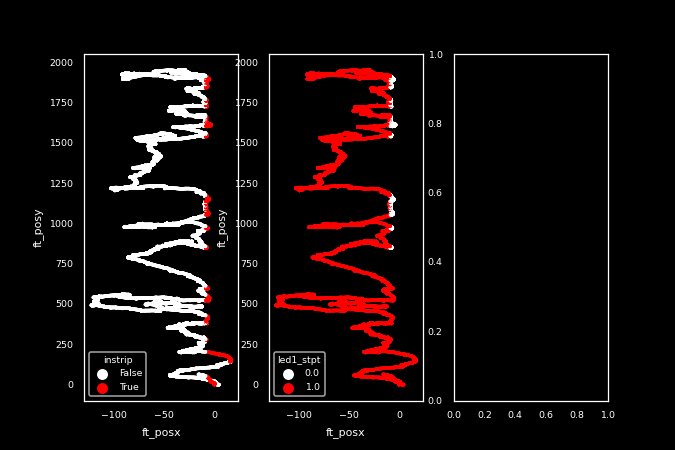

<IPython.core.display.Javascript object>


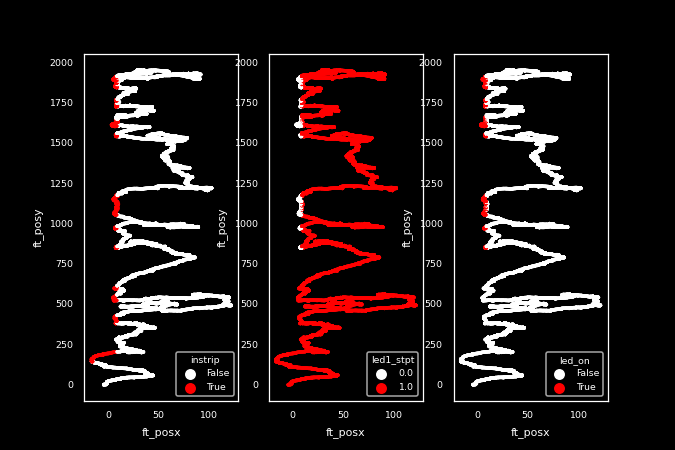

<AxesSubplot: xlabel='ft_posx', ylabel='ft_posy'>

In [40]:
fig, axn = pl.subplots(1,3)
sns.scatterplot(data=df0, x='ft_posx', y='ft_posy', hue='instrip', ax=axn[0],
                palette={True: 'r', False: 'w'}, s=5, edgecolor='none')
sns.scatterplot(data=df0, x='ft_posx', y='ft_posy', hue='led1_stpt', ax=axn[1],
                palette={True: 'r', False: 'w'}, s=5, edgecolor='none')

fig, axn = pl.subplots(1,3)
sns.scatterplot(data=df, x='ft_posx', y='ft_posy', hue='instrip', ax=axn[0],
                palette={True: 'r', False: 'w'}, s=5, edgecolor='none')
sns.scatterplot(data=df, x='ft_posx', y='ft_posy', hue='led1_stpt', ax=axn[1],
                palette={True: 'r', False: 'w'}, s=5, edgecolor='none')
sns.scatterplot(data=df, x='ft_posx', y='ft_posy', hue='led_on', ax=axn[2],
                palette={True: 'r', False: 'w'}, s=5, edgecolor='none')

# get combined df

In [41]:
log_files = butil.get_log_files(src_dir=src_dir, experiment=experiment, verbose=False, is_gdrive=False,
                        return_loginfo=False)

Checking parent dir.
Found 63 tracking files.


In [42]:
importlib.reload(butil)

<module 'behavior' from '/home/julianarhee/Repositories/plume-tracking/behavior.py'>

In [43]:
strip_width=50
strip_sep=200
# is_csv = False
df0_all = butil.load_combined_df(log_files=log_files, logdf=logdf, 
                                 src_dir=src_dir,
                                is_csv=False, experiment=experiment, 
                                savedir=savedir, save_errors=False, create_new=True,
                                parse_filename=True, remove_invalid=True, process=True)
#df0_all = df0_all.rename(columns={'Unnamed: 0': 'frame'})
df0_all.loc[df0_all['condition']=='outisde', 'condition'] = 'outside'
df0_all.loc[df0_all['condition']=='inisde', 'condition'] = 'inside'
condition_list = df0_all['condition'].unique()
print("Found {} conditions:".format(len(condition_list)))
for c in condition_list:
    print(c)

Processing 63 tracking files.
[WARNING] ['10262021-113334_PAMGtACR1_thresh_lights_on_Fly1_001']: Found bad skips, removing 60 of 16116 samples.
[WARNING] ['10272021-160023_PAMGtACR1_thresh_lights_LT_early_Fly1_004']: Found bad skips, removing 8 of 7399 samples.
[WARNING] ['10272021-161524_PAM_GTACR1_thresh_lights_on_Fly1_007']: Found bad skips, removing 15738 of 23710 samples.
[WARNING] ['10272021-163421PAMGTACR1_thresh_lights_on_outside_LT_Fly1_008']: Found bad skips, removing 49 of 9715 samples.
[WARNING] ['10282021-141515_PAMGTACR1_thresh_lights_on_LT_Fly1_001']: Found bad skips, removing 2598 of 26848 samples.
[WARNING] ['10282021-160632_PAMGTACR1_thresh_lights_on_Fly2_003']: Found bad skips, removing 5561 of 20352 samples.
[WARNING] ['10292021-121350_PAMGtACR1_thresh_lights_wanders_off_LT_Fly1_002']: Found bad skips, removing 120 of 14142 samples.
[WARNING] ['10292021-140440_PAMGtACR1_thresh_lights_on_error_LT_Fly2_001']: Found bad skips, removing 3545 of 31240 samples.
[WARNING] 

In [45]:
# save
df_fpath = os.path.join(savedir, 'combined_df.pkl')
print("Saving combined df to: {}".format(savedir))
butil.save_df(df, df_fpath)


Saving combined df to: /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_GtACR1


In [46]:
# if 'fly' in logdf.columns:
#     for fi, df_ in df.groupby('filename'):
#         explicit_fly_id = logdf.loc[logdf['log']=='{}.log'.format(fi)]['fly'].unique()[0]
#         datestr = df_['date'].unique()[0]
#         curr_id = df['fly_id'].unique()[0]
#         print("Renaming: {} to {}".format(curr_id, '{}-fly{}'.format(datestr, explicit_fly_id)))
#         df.loc[df['filename']==fi, 'fly_id'] = '{}-fly{}'.format(datestr, explicit_fly_id)
len(df0_all['fly_id'].unique())

14

In [47]:
df0_all[['fly_id', 'trial']].drop_duplicates()


,fly_id,trial
0,20211026-fly1,10262021-125040
0,20211026-fly1,10262021-113334
0,20211026-fly1,10262021-114313
0,20211026-fly1,10262021-120011
0,20211027-fly2,10272021-150422
0,20211027-fly2,10272021-154410
0,20211027-fly2,10272021-160023
0,20211027-fly2,10272021-160508
0,20211027-fly2,10272021-161524
0,20211027-fly2,10272021-163421


In [144]:
importlib.reload(butil)

<module 'behavior' from '/home/julianarhee/Repositories/plume-tracking/behavior.py'>

In [48]:

# # plot fly x cond
# fig = butil.plot_fly_by_condition(df0_all, strip_width=strip_width,
#                 row_order=['none', 'inside', 'outside', 'lights'])
# # save
# figname = 'traj-all-by-cond'
# util.label_figure(fig, fig_id)
# pl.savefig(os.path.join(figdir, '{}.png'.format(figname))) #, dpi=dpi)
# print(figdir, figname)


In [49]:
df0_all.columns

Index(['timestamp -- motor_step_command', 'mfc1_stpt', 'mfc2_stpt',
       'mfc3_stpt', 'led1_stpt', 'led2_stpt', 'sig_status', 'ft_posx',
       'ft_posy', 'ft_frame', 'ft_error', 'ft_roll', 'ft_pitch', 'ft_yaw',
       'ft_heading', 'instrip', 'filename', 'fpath', 'timestamp',
       'motor_step_command', 'time', 'rel_time', 'date', 'odor_on',
       'strip_type', 'led_on', 'experiment', 'fly_name', 'condition', 'trial',
       'fly_id', 'trial_id', 'boutnum', 'cum_time', 'speed', 'upwind_speed',
       'crosswind_speed', 'euclid_dist', 'upwind_dist', 'crosswind_dist'],
      dtype='object')

In [64]:
# currcond = 'inside'
# df = df0_all[df0_all['condition']==currcond].copy()
# len(df['fly_id'].unique())
#
select_logs = [
    '10292021-142308_PAMGTACR1_thresh_lights_LT_Fly2_002.log',
    '10292021-143856_PAMGTACR1_thresh_lights_LT_Fly2_003.log',
    '11102021_Fly1/11102021-104614_PAMGtACR1_thresh_lights_old_food_yeast_Fly1_001.log',
    '11102021-110114_PAMGTACR1_thresh_lights_old_food_yeast_Fly1_002.log',
    '11102021-134854_PAMGtACR1_thresh_lights_old_food_yeast_Fly2_001.log',
    '11102021-140908_PAMGtACR1_thresh_lights_old_food_yeast_Fly2_002.log',
    '11122021-151822_PAMGtACR1_Fly1_001.log',
    '11122021-151822_PAMGtACR1_Fly1_001.log',
    '11152021-150321_PAMGtACR1_Fly1_002.log',
    '11152021-153105_PAMGtACR1_Fly1_003.log',
    '11162021-104332_PAMGTACR1_Fly1_001.log',
    '11162021-105012_PAMGtACR1_Fly1_002.log',
]

# make output dirs for figures
if not os.path.exists(os.path.join(figdir, 'selected')):
    os.makedirs(os.path.join(figdir, 'selected'))
incl_logs = [os.path.splitext(f)[0] for f in select_logs]

if not os.path.exists(os.path.join(figdir, 'inside_lights')):
    os.makedirs(os.path.join(figdir, 'inside_lights'))

only_selected=False    
# select dataset
if only_selected:    
    df = df0_all[df0_all['filename'].isin(incl_logs)].copy()
    curr_figdir = os.path.join(figdir, 'selected')
else:
    df = df0_all[df0_all['condition'].isin(['inside', 'lights'])].copy()
    curr_figdir = os.path.join(figdir, 'inside_lights')
len(df['fly_id'].unique())

13

In [51]:
instrip_palette = {True: 'r', False: 'w'}

<IPython.core.display.Javascript object>


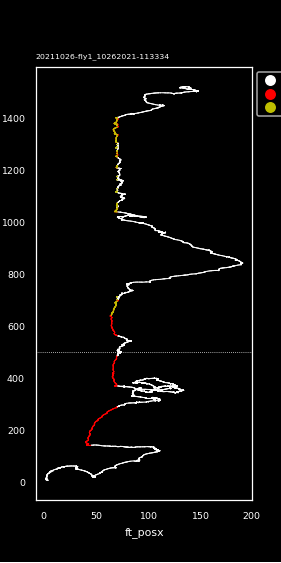

In [57]:
# fly_id = df['fly_id'].unique()[0]
# df_ = df[df['fly_id']==fly_id].copy()
# # 
# ntrials = len(df_['trial_id'].unique())
# fig, axn = pl.subplots(1, ntrials, figsize=(ntrials*2.5, 5))
# if len(df_['trial_id'].unique())==1:
#     sns.scatterplot(data=df_, x="ft_posx", y="ft_posy", hue='instrip', ax=axn,
#                     s=.5, edgecolor='none', palette=instrip_palette)
#     sns.scatterplot(data=df_[df_['led_on']], x="ft_posx", y="ft_posy", hue='led_on', ax=axn,
#                     s=.5, edgecolor='none', palette={True: 'y'})
#     axn.set_box_aspect(2)
#     axn.axhline(y=500, linestyle=':', c='w', linewidth=0.5)
#     if df_['filename'].unique()[0] in incl_logs:
#         plot_title = '*{}'.format(df_['trial_id'].unique()[0])
#     else:
#         plot_title = df_['trial_id'].unique()[0]
#     axn.set_title(plot_title, fontsize=5, loc='left')
#     axn.legend(bbox_to_anchor=(1,1), loc='upper left')

<IPython.core.display.Javascript object>


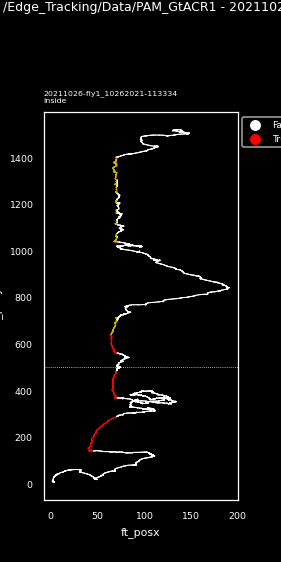

<IPython.core.display.Javascript object>


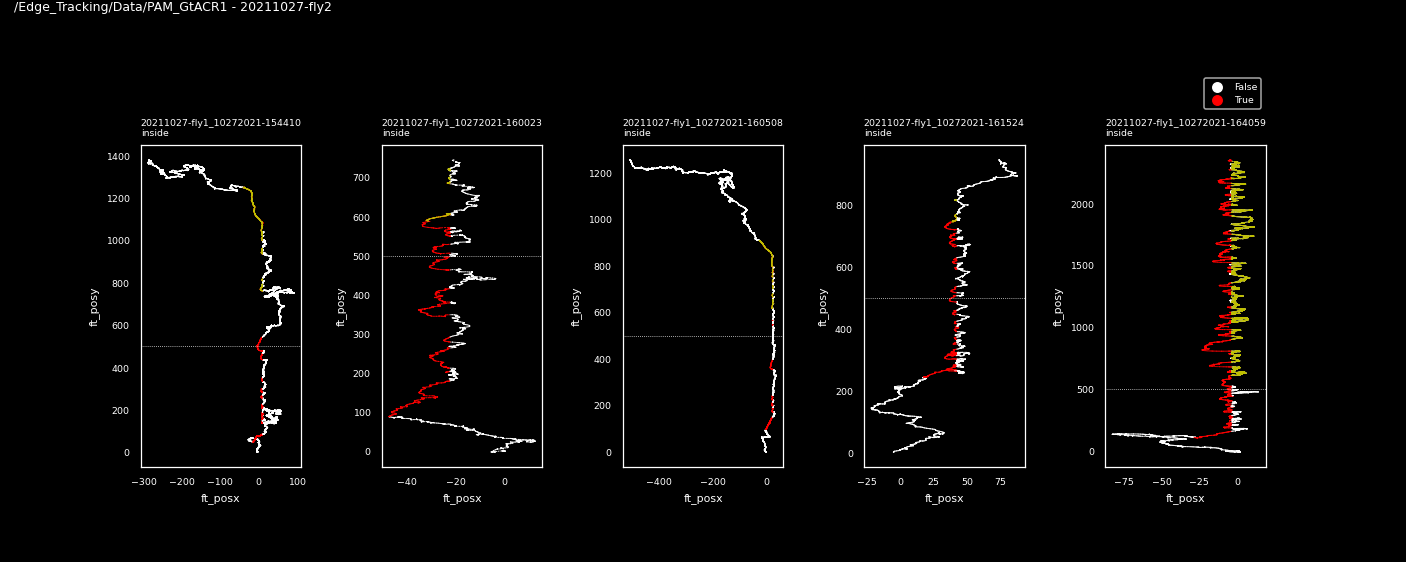

<IPython.core.display.Javascript object>


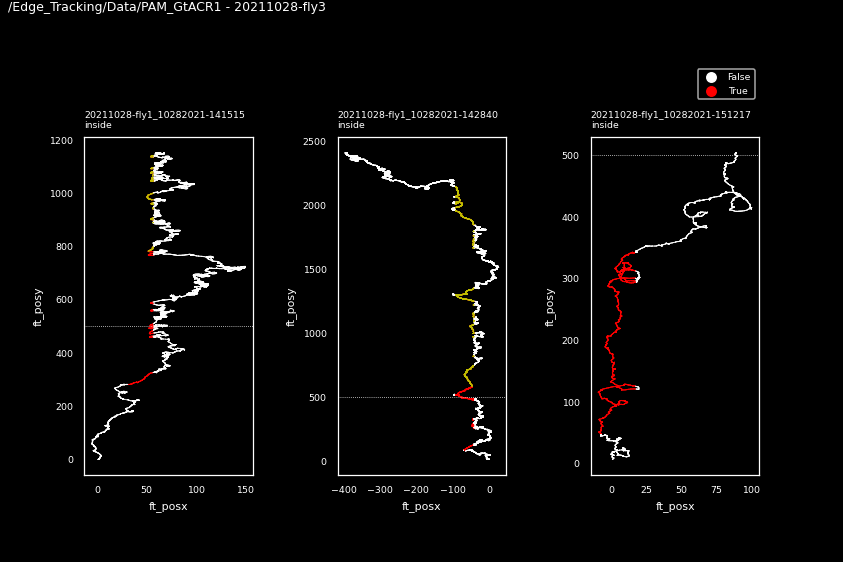

/tmp/ipykernel_3516357/638874636.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led1_stpt']==0], x="ft_posx", y="ft_posy", hue='led1_stpt', ax=ax,


<IPython.core.display.Javascript object>


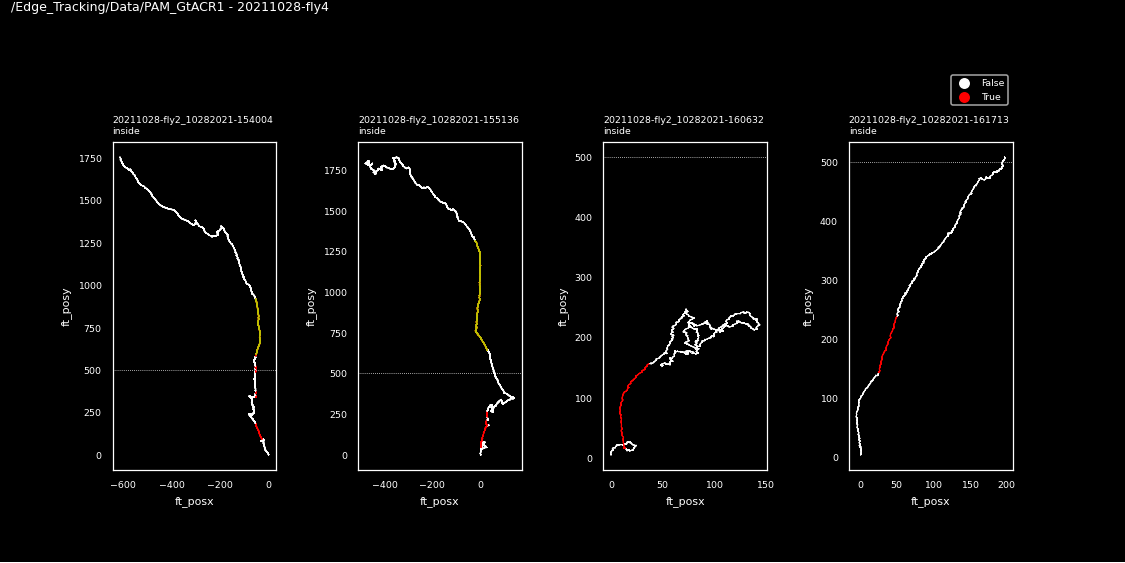

/tmp/ipykernel_3516357/638874636.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led1_stpt']==0], x="ft_posx", y="ft_posy", hue='led1_stpt', ax=ax,
/tmp/ipykernel_3516357/638874636.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led1_stpt']==0], x="ft_posx", y="ft_posy", hue='led1_stpt', ax=ax,


<IPython.core.display.Javascript object>


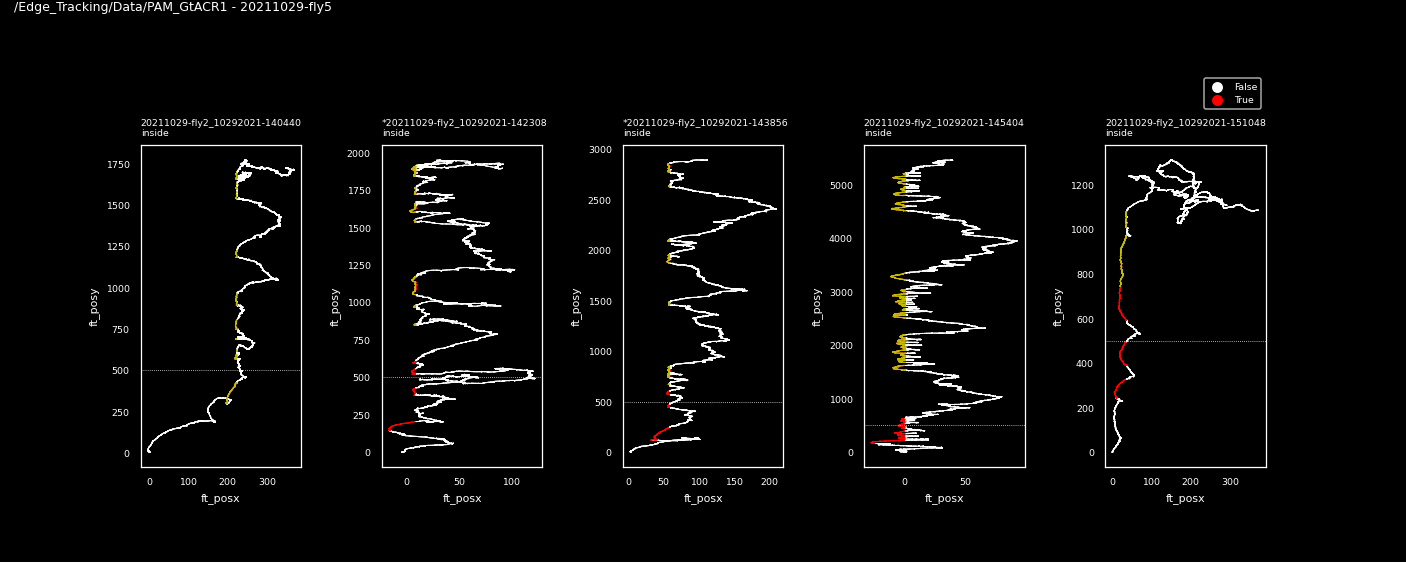

<IPython.core.display.Javascript object>


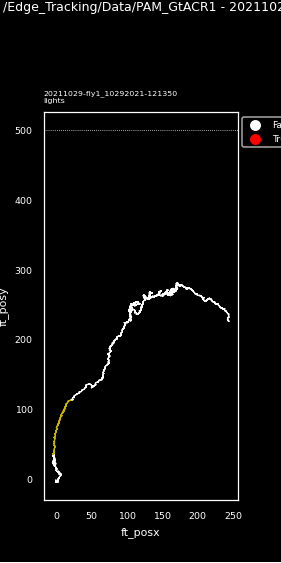

<IPython.core.display.Javascript object>


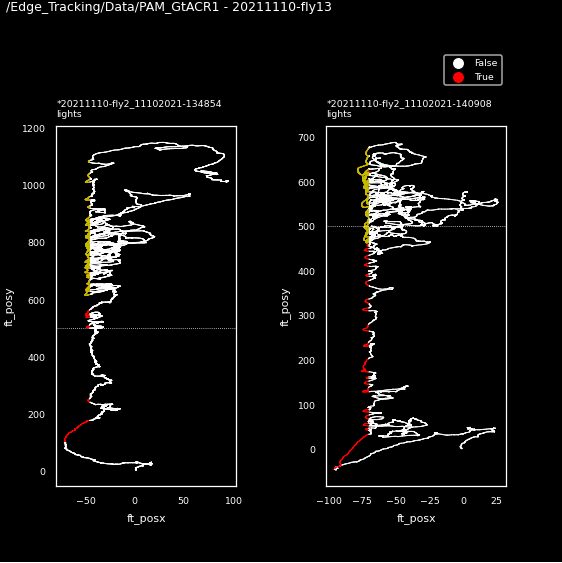

<IPython.core.display.Javascript object>


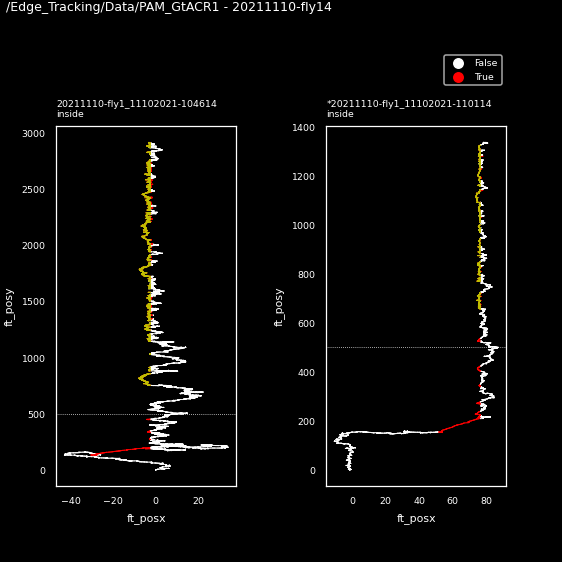

<IPython.core.display.Javascript object>


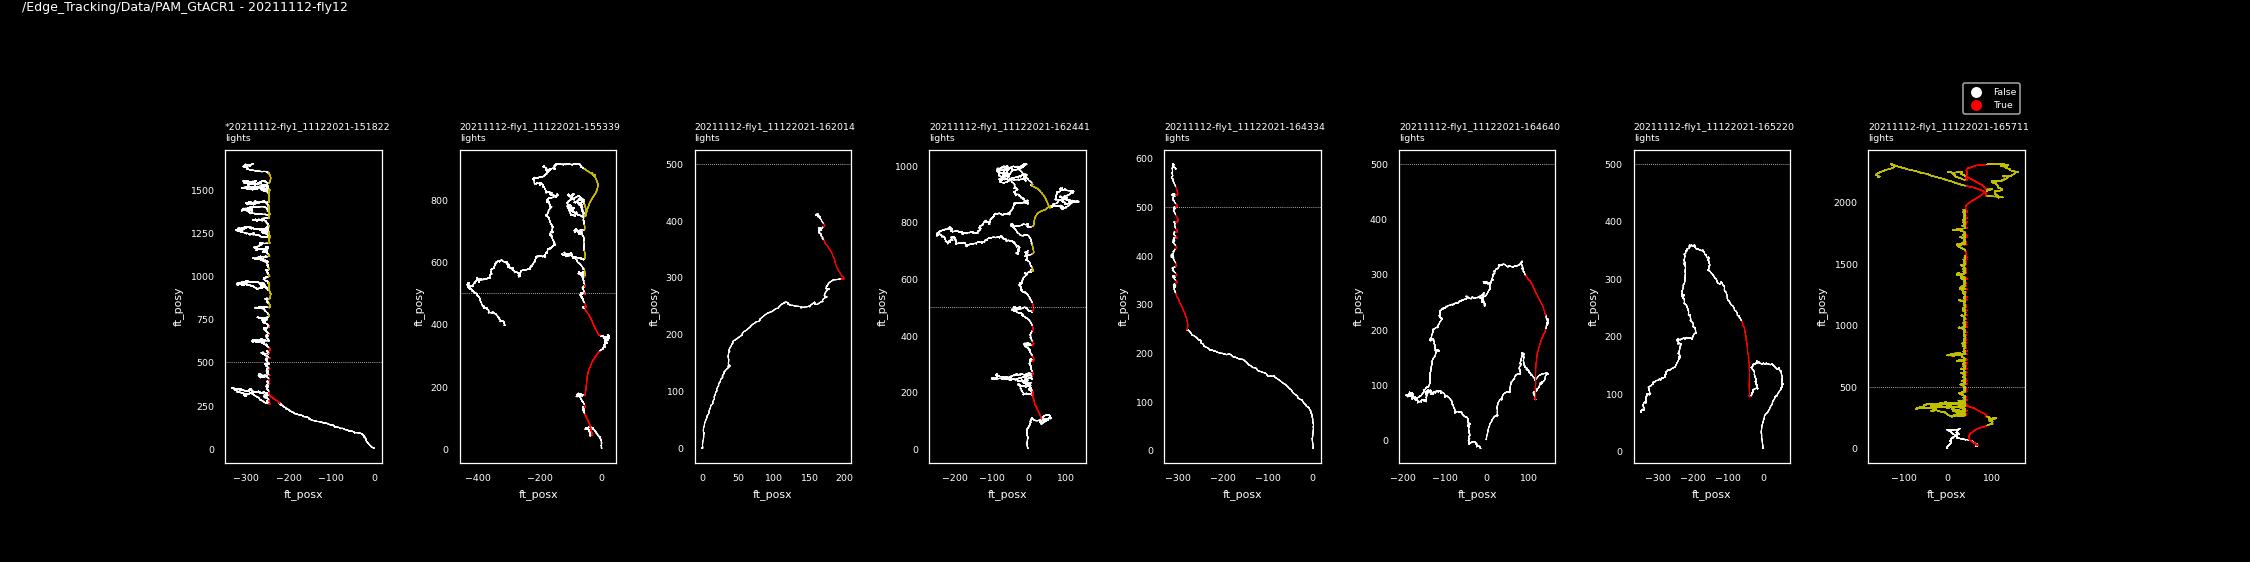

/tmp/ipykernel_3516357/638874636.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led1_stpt']==0], x="ft_posx", y="ft_posy", hue='led1_stpt', ax=ax,
/tmp/ipykernel_3516357/638874636.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led1_stpt']==0], x="ft_posx", y="ft_posy", hue='led1_stpt', ax=ax,
/tmp/ipykernel_3516357/638874636.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led1_stpt']==0], x="ft_posx", y="ft_posy", hue='led1_stpt', ax=ax,
/tmp/ipykernel_3516357/638874636.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led1_stpt']==0], x="ft_posx", y="ft_posy", hue='led1_stpt', ax=ax,


<IPython.core.display.Javascript object>


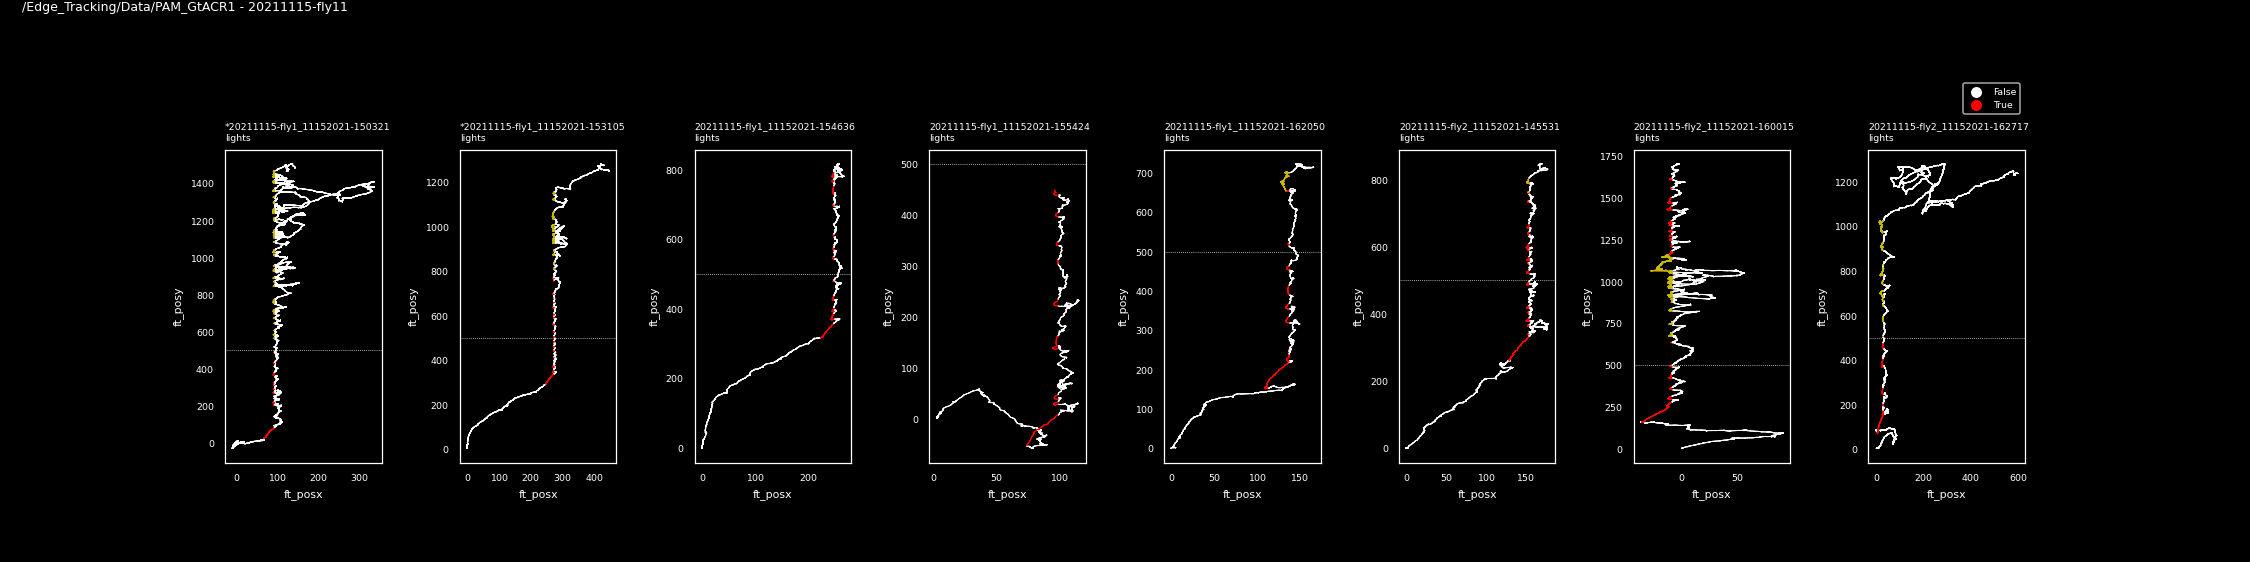

/tmp/ipykernel_3516357/638874636.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led1_stpt']==0], x="ft_posx", y="ft_posy", hue='led1_stpt', ax=ax,
/tmp/ipykernel_3516357/638874636.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led1_stpt']==0], x="ft_posx", y="ft_posy", hue='led1_stpt', ax=ax,


<IPython.core.display.Javascript object>


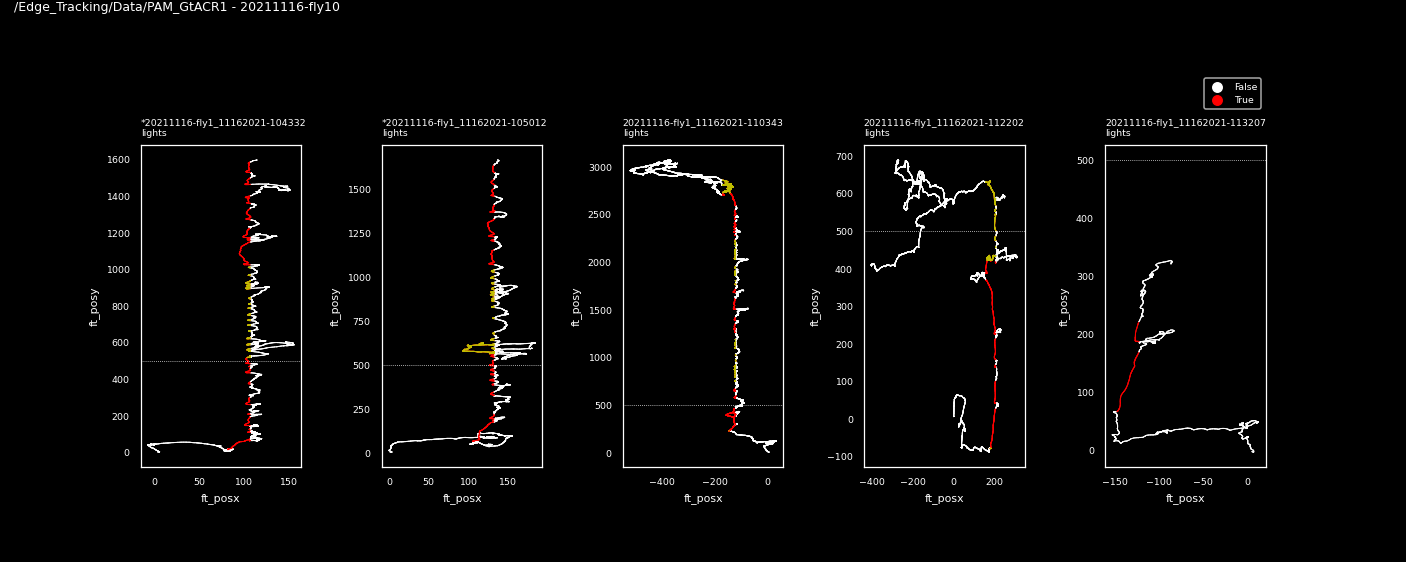

/tmp/ipykernel_3516357/638874636.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led1_stpt']==0], x="ft_posx", y="ft_posy", hue='led1_stpt', ax=ax,


<IPython.core.display.Javascript object>


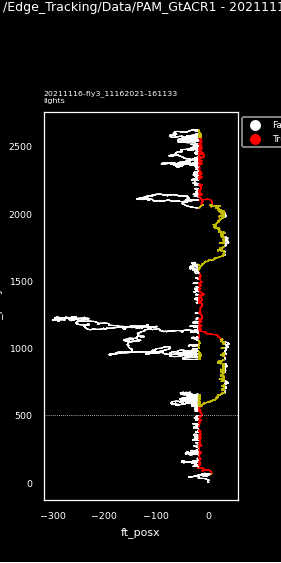

<IPython.core.display.Javascript object>


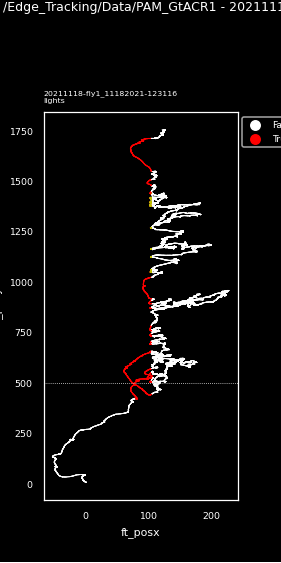

In [69]:

# g = sns.FacetGrid(df, col='trial_id', row='fly_id', aspect=0.5)
# g.map_dataframe(sns.scatterplot, x="ft_posx", y="ft_posy", hue='instrip',
#             s=0.5, edgecolor='none', palette=instrip_palette) #, palette=palette)
# g.set_titles(row_template = '{row_name}', col_template = '{col_name}', size=6)

for fly_id, df_ in df.groupby('fly_id'):
    ntrials = len(df_['trial_id'].unique())
    fig, axn = pl.subplots(1, ntrials, figsize=(ntrials*2.5, 5))
    if len(df_['trial_id'].unique())==1:
        sns.scatterplot(data=df_, x="ft_posx", y="ft_posy", hue='instrip', ax=axn,
                        s=.5, edgecolor='none', palette=instrip_palette)
        sns.scatterplot(data=df_[df_['led1_stpt']==0], x="ft_posx", y="ft_posy", hue='led1_stpt', ax=axn,
                    s=.5, edgecolor='none', palette={0: 'y'}, legend=False)
        axn.set_box_aspect(2)
        axn.axhline(y=500, linestyle=':', c='w', linewidth=0.5)
        if df_['filename'].unique()[0] in incl_logs:
            trial_id = '*{}'.format(df_['trial_id'].unique()[0])
        else:
            trial_id = df_['trial_id'].unique()[0]
        currcond = df_['condition'].unique()[0]
        plot_title = "{}{}{}".format(trial_id, '\n', currcond)
        axn.set_title(plot_title, fontsize=5, loc='left')
        axn.legend(bbox_to_anchor=(1,1), loc='upper left')
    else:
        for ai, (ax, (trial_id, tdf_)) in enumerate(zip(axn.flat, df_.groupby('trial_id'))):
            sns.scatterplot(data=tdf_, x="ft_posx", y="ft_posy", hue='instrip', ax=ax,
                            s=.5, edgecolor='none', palette=instrip_palette)
            sns.scatterplot(data=tdf_[tdf_['led1_stpt']==0], x="ft_posx", y="ft_posy", hue='led1_stpt', ax=ax,
                    s=.5, edgecolor='none', palette={0: 'y'}, legend=False)
            ax.set_box_aspect(2)
            ax.axhline(y=500, linestyle=':', c='w', linewidth=0.5)
            if tdf_['filename'].unique()[0] in incl_logs:
                trial_id = '*{}'.format(tdf_['trial_id'].unique()[0])
            else:
                trial_id = tdf_['trial_id'].unique()[0]
            currcond = tdf_['condition'].unique()[0]
            plot_title = "{}{}{}".format(trial_id, '\n', currcond)
            ax.set_title(plot_title, fontsize=6, loc='left')
            if ai == (ntrials-1):
                ax.legend(bbox_to_anchor=(1,1.1), loc='lower right')
            else:
                ax.legend_.remove()
    pl.subplots_adjust(left=0.1, right=0.9, wspace=0.5, top=0.8)
    util.label_figure(fig, '{} - {}'.format(fig_id, fly_id))
    pl.savefig(os.path.join(curr_figdir, '{}.png'.format(fly_id)))

In [ ]:
tdf_['led_on'].unique()

In [211]:
fly_id = '20211110-fly13'
df_ = df[df['fly_id']==fly_id].copy()
df_['trial_id'].unique()
    

array(['20211110-fly2_11102021-134854', '20211110-fly2_11102021-140908'],
      dtype=object)

<IPython.core.display.Javascript object>


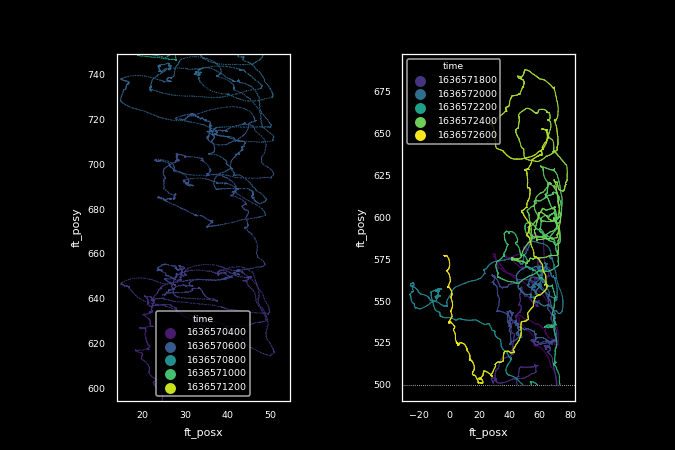

/tmp/ipykernel_449349/955767943.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for ax, (trial_id, d_) in zip(axn.flat, df_.groupby(['trial_id'])):


In [217]:
n_trials = len(df_['trial_id'].unique())
fig, axn = pl.subplots(1, n_trials)
for ax, (trial_id, d_) in zip(axn.flat, df_.groupby(['trial_id'])):
    plotdf=d_[d_['ft_posy']>=500].copy()
    sns.scatterplot(data=plotdf, x="ft_posx", y="ft_posy", hue='time', ax=ax,
                    s=.5, edgecolor='none', palette='viridis')
    ax.set_box_aspect(2)
    ax.axhline(y=500, linestyle=':', c='w', linewidth=0.5)

In [243]:
strip_borders={}
for trial_id, d_ in df_.groupby('trial_id'):
    curr_borders = butil.find_strip_borders(d_, strip_width=50, is_grid=False)
    strip_borders[trial_id] = curr_borders
strip_borders

{'20211110-fly2_11102021-134854': [(46.39522462439108, 96.414856227559)],
 '20211110-fly2_11102021-140908': [(70.24675544542139, 120.246757837264)]}

In [294]:
import seaborn as sns

In [304]:
colors = mpl.cm.coolwarm(np.linspace(0, 1, 2))
hue_values = [True, False]
cdict = dict((k, v) for k, v in zip(hue_values, colors))


In [328]:
from matplotlib import animation

class AnimatedScatter(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, d_, hue_var='instrip', strip_borders=[], cdict={},
                 n_trailing=10, offset=5, interval=33.33): #, numpoints=50):
        self.numpoints = len(d_) #numpoints
        self.stream = self.data_stream(d_, hue_var=hue_var)
        self.strip_borders = strip_borders
        self.n_trailing = n_trailing
        # Setup the figure and axes...
        self.fig, self.ax = pl.subplots()
#         self.scat = self.ax.scatter(d_['ft_posx'], d_['ft_posy'], c=d_['instrip'], 
#                                      s=2, edgecolor='none', cmap='coolwarm')
        self.scat = self.ax.scatter([], [], c=[], s=2, vmin=0, vmax=1,
                                    edgecolor='none', cmap='coolwarm')
        self.cdict = cdict
        for (omin, omax) in self.strip_borders:
            self.ax.axvline(x=omin, color='w', lw=0.25, linestyle=':')
            self.ax.axvline(x=omax, color='w', lw=0.25, linestyle=':')
        xmin, xmax = np.floor(d_['ft_posx'].min()), np.ceil(d_['ft_posx'].max())
        ymin, ymax = np.floor(d_['ft_posy'].min()), np.ceil(d_['ft_posy'].max())
        self.ax.axis([xmin-offset, xmax+offset, ymin-offset*2, ymax+offset*2])
        print(xmin, xmax, ymin, ymax)
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=interval, 
                                          init_func=self.setup_plot, blit=True,
                                          save_count=d_.shape[0])

    def setup_plot(self, cmap='coolwarm', vmin=0, vmax=1):
        """Initial drawing of the scatter plot."""
        #x, y, c = next(self.stream).T
        x, y, c = self.stream.T
        # print(x, y, c)
        #self.scat = self.ax.scatter([], [], c=[], s=5, vmin=vmin, vmax=vmax,
        #                            cmap=cmap, edgecolor='none')
        self.scat = self.ax.scatter([], [], c=[], s=2, vmin=vmin, vmax=vmax,
                                    edgecolor='none')
        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def data_stream(self, d_, hue_var='instrip'):
        x = d_['ft_posx'].values
        y = d_['ft_posy'].values
        c = d_[hue_var].values
        return np.c_[x, y, c]
    
    def update(self, i):
        """Update the scatter plot."""
#         data = next(self.stream)
        data = self.stream
#             x_ = x[i-n_trailing:i]
#             y_ = y[i-n_trailing:i]
#             c_ = c[i-n_trailing:i]
        # Set x and y data...
        self.scat.set_offsets(data[0:i, :2])
        #self.scat.set_array(data[0:i, 2])
        #c_ = [tuple([1, 1, 1, 1/i]) for i in np.arange(1, i)]
        #cc_ = [self.cdict[i] for i in c_]
        #self.scat.set_array(cc_)
        # Set sizes...
        #self.scat.set_sizes(300 * abs(data[:, 2])**1.5 + 100)
        # Set colors..
        #cc_ = [ tuple(self.cdict[i]) for i in data[0:i, 2]]
        cc_ = data[0:i, 2]
        self.scat.set_array(cc_)
        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

In [324]:
ani.stream[0:5, 2]

array([1., 1., 1., 1., 1.])

In [325]:
df['condition'].unique()

array(['inside', 'lights'], dtype=object)

In [326]:
trial_id = '20211110-fly2_11102021-140908'
start_ix = df_[(df_['trial_id']==trial_id) & (df_['instrip'])].iloc[0].name
d_ = df_[df_['trial_id']==trial_id].loc[start_ix:]
curr_borders = strip_borders[trial_id]

26.701703973312316


<IPython.core.display.Javascript object>


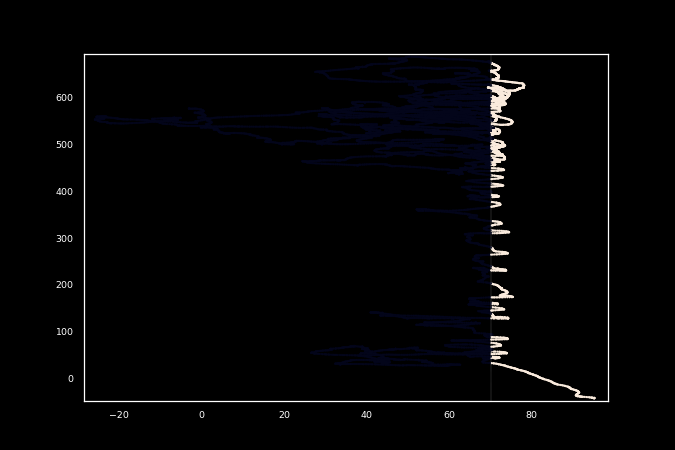

-26.0 96.0 -42.0 689.0


In [330]:
acq_interva1 = d_['time'].diff().mean()*1000
print(acq_interva1)
ani = AnimatedScatter(d_, strip_borders=curr_borders, offset=2.5, cdict=cdict, interval=5, hue_var='instrip')
ani.ani

In [314]:
ani.ani

In [283]:
FFwriter = animation.FFMpegWriter(fps=30)
figname = 'anim_{}'.format( trial_id)
ani_outfile = os.path.join(figdir, '{}.mp4'.format(figname))
ani.ani.save(ani_outfile, writer=FFwriter)
print(ani_outfile)

ValueError: Collections can only map rank 1 arrays